# Creating Enticing Visuals

#### Prompt:
Great stories and great visual effects

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as prep

from mpl_toolkits.mplot3d import Axes3D #for 3D plots

from sklearn.ensemble import IsolationForest as isoForest
from sklearn.neighbors import LocalOutlierFactor as LOF

#Import datasets with same time sample
timeSeries=pd.read_csv('../data/external/MarchAnalytics.csv')
timeSeries=timeSeries.drop(columns=['Unnamed: 0'])
timeSeries=timeSeries.set_index('timestamp')
timeSeries.head()

,CPU,ELB,Network
timestamp,,,
2014-04-10 00:04:00,0.901235,0.141985,0.000870
2014-04-10 00:09:00,0.938272,0.083969,0.012914
2014-04-10 00:14:00,0.913580,0.283969,0.001015
2014-04-10 00:19:00,0.925926,0.143511,0.000818
2014-04-10 00:24:00,0.925926,0.076336,0.000846


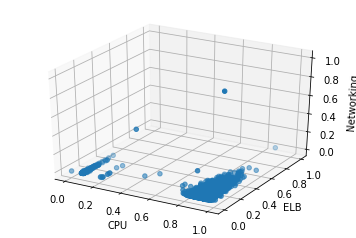

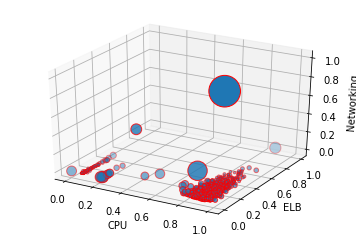

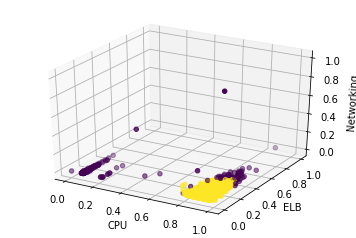

In [2]:
LOFData=timeSeries

#Convert to numpy array
LOFData=np.array(LOFData)

clf = LOF()
anomalies=clf.fit_predict(LOFData)
Anomal_scores = clf.negative_outlier_factor_

# 3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(LOFData[:, 0], LOFData[:, 1], LOFData[:, 2])
ax.set_xlabel('CPU')
ax.set_ylabel('ELB')
ax.set_zlabel('Networking')
plt.show()

#Start with 3D plot
# 3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
radius = (Anomal_scores.max() - Anomal_scores) / (Anomal_scores.max() - Anomal_scores.min())
ax.scatter(LOFData[:, 0], LOFData[:, 1], LOFData[:, 2], s=1000 * radius, edgecolors='r')
ax.set_xlabel('CPU')
ax.set_ylabel('ELB')
ax.set_zlabel('Networking')
plt.show()

# fit the model
clf = isoForest()
clf.fit(LOFData)
anomalies = clf.predict(LOFData)


#Start plotting
# 3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(LOFData[:, 0], LOFData[:, 1], LOFData[:, 2],c=anomalies)

ax.set_xlabel('CPU')
ax.set_ylabel('ELB')
ax.set_zlabel('Networking')
plt.show()

## Bokeh Plots
https://bokeh.pydata.org/en/latest/docs/gallery/stocks.html

In [3]:
from bokeh.plotting import figure,show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot

output_notebook()

Loading BokehJS ...

In [4]:
timeSeries.index=pd.to_datetime(timeSeries.index)
timeSeries.sort_index(inplace=True)

p1=figure(x_axis_type='datetime')
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Utilization'

p1.line(timeSeries.index,timeSeries['CPU'],color='#FB9A99', legend='CPU')
p1.line(timeSeries.index,timeSeries['ELB'],color='#A6CEE3', legend='ELB')
p1.line(timeSeries.index,timeSeries['Network'],color='#33A02C', legend='Network')
p1.legend.location = "top_left"
show(p1)


p=figure(x_axis_type='datetime')
p.grid.grid_line_alpha=0.3
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Utilization'

p.scatter(timeSeries.index,timeSeries['CPU'],color='#FB9A99', legend='CPU')
p.scatter(timeSeries.index,timeSeries['ELB'],color='#A6CEE3', legend='ELB')
p.scatter(timeSeries.index,timeSeries['Network'],color='#33A02C', legend='Network')
p.legend.location = "top_left"

show(p)

## Plotly
https://plot.ly/python/3d-scatter-plots/
https://plot.ly/~wymok/38/anomaly-detections-for-realtraffictraveltime-387csv/#/code
Need to: pip install plotly 

In [36]:
#conda install -c anaconda plotly in anaconda cmd
import plotly as py
import plotly.graph_objs as go

#Place anomalies in dataframe
timeSeries['anomalies']=anomalies

regular=timeSeries[timeSeries.anomalies==1]
bad=timeSeries[timeSeries.anomalies==-1]


py.offline.init_notebook_mode(connected=True)
  
trace1 = go.Scatter(
    x=regular.index.values,
    y=regular.CPU.values,
    mode='lines',
    name='Good'
)

trace2 = go.Scatter(
    x=bad.index.values,
    y=bad.CPU.values,
    mode='markers',
    name='Anomalies'
)

data=[trace1,trace2]

    
py.offline.iplot(data)